In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

In [2]:
data = pd.read_csv("../data/clean.csv")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,Pre-HSgrad,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,Pre-HSgrad,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,257302,Assoc,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
45218,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
45219,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
45220,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Build X and y
y = data['income']
X = data.drop(['income'], axis=1)

In [4]:
# split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# split numericals and categoricals
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(['object'])
X_test_cat  = X_test_df.select_dtypes(['object'])

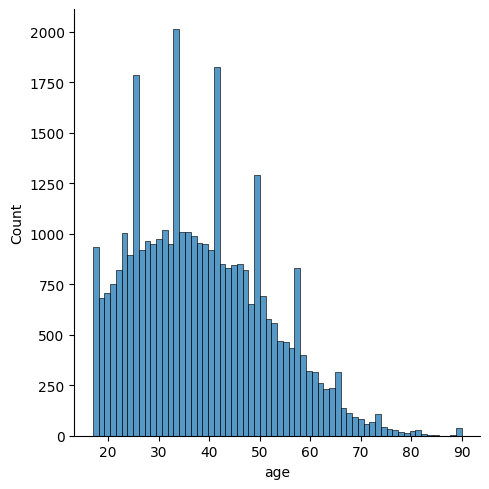

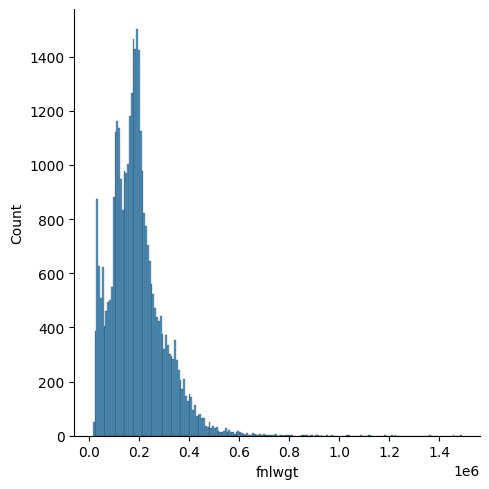

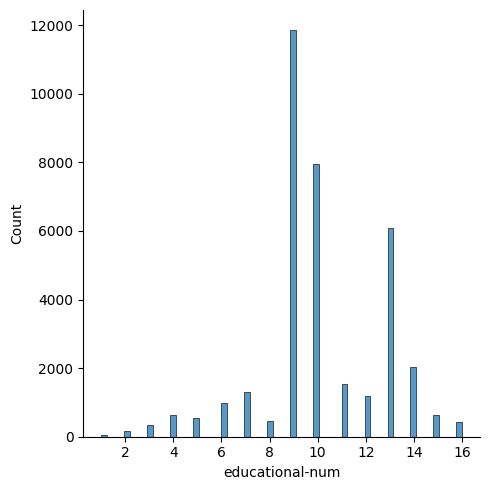

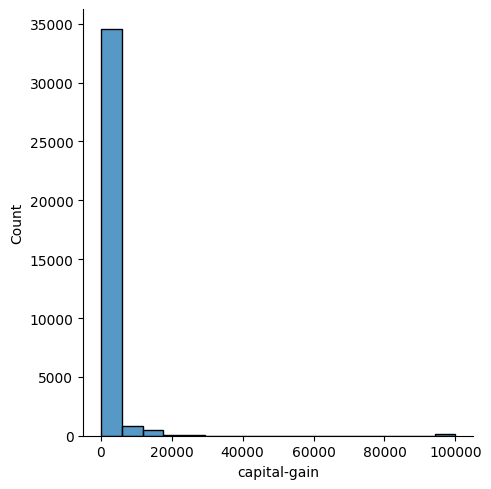

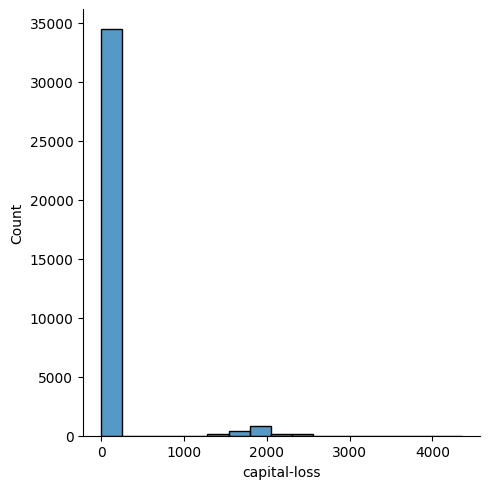

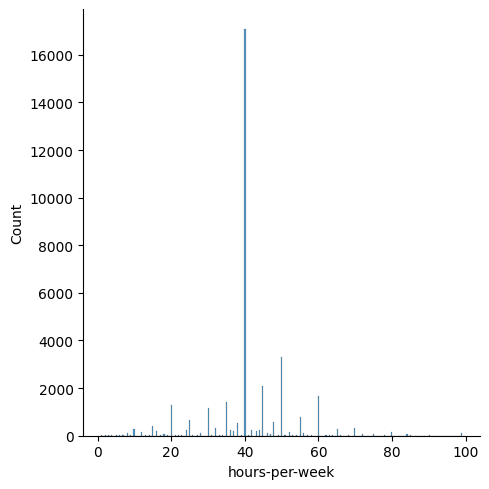

In [6]:
# plot distributions for numericals
sns.displot(X_train_num['age'])
plt.show()

sns.displot(X_train_num['fnlwgt'])
plt.show()

sns.displot(X_train_num['educational-num'])
plt.show()

sns.displot(X_train_num['capital-gain'])
plt.show()

sns.displot(X_train_num['capital-loss'])
plt.show()

sns.displot(X_train_num['hours-per-week'])
plt.show()

In [7]:
from sklearn.preprocessing import PowerTransformer


# Transforming distribtutions
transformer = PowerTransformer()
transformer.fit(X_train_num)
X_train_scaled = transformer.transform(X_train_num)
X_test_scaled  = transformer.transform(X_test_num)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X_test_num.columns)
X_train_scaled.head()
#sns.displot(X_train_num)
#plt.show()
# after the fit.
# Save your scaler with pickle.



,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,-0.670522,0.799631,1.156495,-0.303593,-0.223422,-0.071225
1,0.165596,-0.857281,1.156495,-0.303593,-0.223422,0.756949
2,0.312181,0.587641,1.156495,-0.303593,-0.223422,-2.192907
3,-1.520201,-0.723412,-0.094784,-0.303593,-0.223422,-2.192907
4,1.373498,0.320248,-0.487806,-0.303593,-0.223422,0.756949


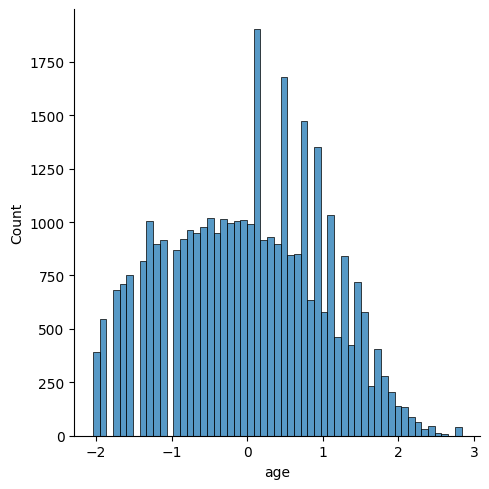

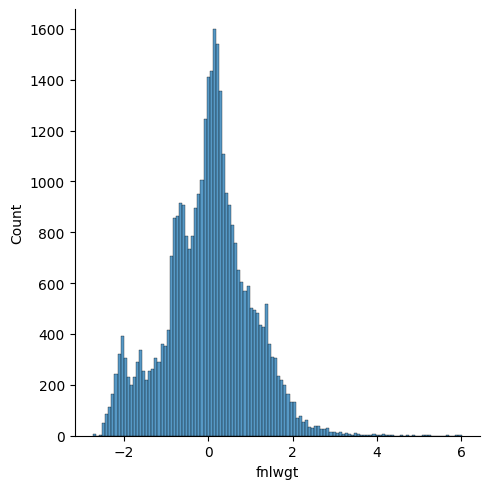

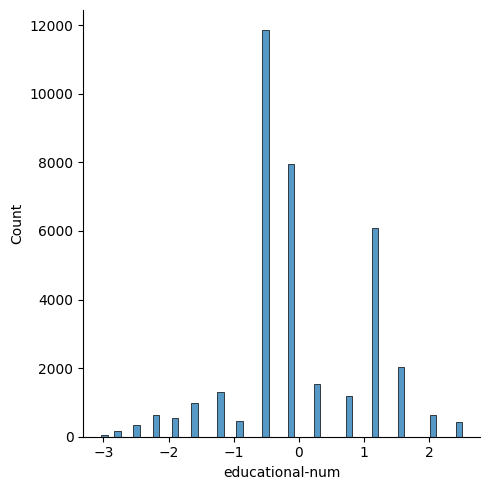

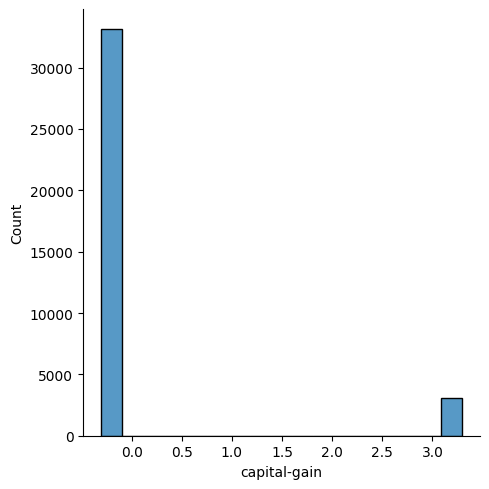

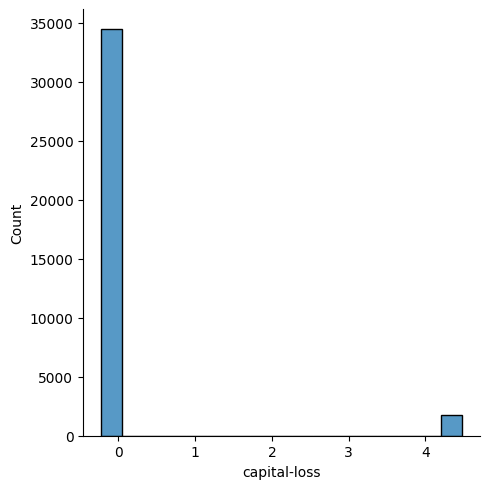

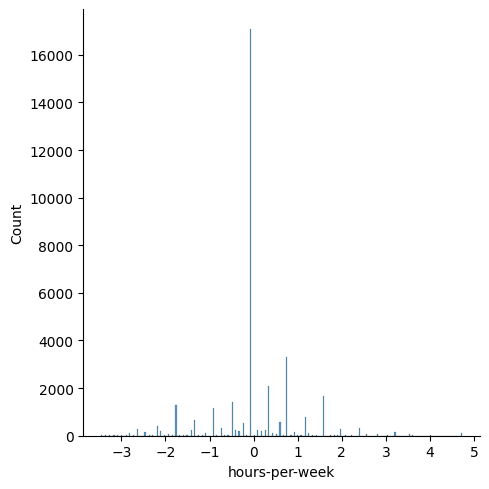

In [8]:
sns.displot(X_train_scaled['age'])
plt.show()

sns.displot(X_train_scaled['fnlwgt'])
plt.show()

sns.displot(X_train_scaled['educational-num'])
plt.show()

sns.displot(X_train_scaled['capital-gain'])
plt.show()

sns.displot(X_train_scaled['capital-loss'])
plt.show()

sns.displot(X_train_scaled['hours-per-week'])
plt.show()

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first') 
encoder.fit(X_train_cat)
# save the encoder
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=cols)
X_train_encoded_df.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_Bachelors,education_HS-grad,education_Post-grad,education_Pre-HSgrad,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
X_train_treated_df = pd.concat([X_train_scaled, X_train_encoded_df], axis=1)
X_train_treated_df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.670522,0.799631,1.156495,-0.303593,-0.223422,-0.071225,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.165596,-0.857281,1.156495,-0.303593,-0.223422,0.756949,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.312181,0.587641,1.156495,-0.303593,-0.223422,-2.192907,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.520201,-0.723412,-0.094784,-0.303593,-0.223422,-2.192907,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.373498,0.320248,-0.487806,-0.303593,-0.223422,0.756949,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36172,0.165596,2.293233,-1.583106,-0.303593,-0.223422,-0.071225,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36173,-0.065713,-0.652070,1.595628,-0.303593,-0.223422,0.756949,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36174,1.090057,-1.929931,-1.916379,-0.303593,-0.223422,-0.071225,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36175,1.318395,0.132877,0.310722,-0.303593,-0.223422,-0.071225,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
X_train_treated_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,36177.000000,36177.000000,36177.000000,36177.00000,...,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000
mean,-6.249681e-16,-3.748925e-16,5.735094e-16,-5.892219e-18,5.735094e-17,-1.865869e-17,0.069271,0.736435,0.036570,0.08287,...,0.001520,0.003787,0.000525,0.002267,0.001327,0.000746,0.000608,0.912818,0.001907,0.000553
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,0.253917,0.440572,0.187707,0.27569,...,0.038962,0.061422,0.022911,0.047556,0.036402,0.027309,0.024653,0.282106,0.043631,0.023506
min,-2.042803e+00,-2.730531e+00,-3.033654e+00,-3.035932e-01,-2.234218e-01,-3.454159e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.659546e-01,-6.183867e-01,-4.878056e-01,-3.035932e-01,-2.234218e-01,-7.122491e-02,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.300983e-02,5.080124e-02,-9.478389e-02,-3.035932e-01,-2.234218e-01,-7.122491e-02,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.206726e-01,5.874417e-01,1.156495e+00,-3.035932e-01,-2.234218e-01,3.439379e-01,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.834396e+00,6.004007e+00,2.504011e+00,3.293948e+00,4.475840e+00,4.723394e+00,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='ovr')

classification.fit(X_train_treated_df, y_train)
# save the model with pickle

LogisticRegression(multi_class='ovr', random_state=0, solver='saga')

In [13]:
X_test_scaled.head()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.771003,-2.135740,-1.583106,-0.303593,-0.223422,-0.071225
1,0.589303,-2.251241,-0.487806,-0.303593,-0.223422,-0.071225
2,0.720673,1.923406,0.310722,-0.303593,-0.223422,-0.071225
3,-1.287069,-1.771219,-0.094784,-0.303593,-0.223422,-0.071225
4,1.090057,0.030952,-0.487806,-0.303593,-0.223422,-0.071225


In [14]:
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test_df = pd.DataFrame(encoded_test_cat, columns=cols)
onehot_encoded_test_df.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_Bachelors,education_HS-grad,education_Post-grad,education_Pre-HSgrad,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
X_test_treated_df = pd.concat([X_test_scaled, onehot_encoded_test_df], axis=1)

In [16]:
y_train_pred = classification.predict(X_train_treated_df)
y_test_pred  = classification.predict(X_test_treated_df)
print("The first predictions on the TRAIN set are: ",y_train_pred[:5])
print("The first predictions on the TEST set are: ",y_test_pred[:5])

The first predictions on the TRAIN set are:  ['<=50K' '>50K' '>50K' '<=50K' '<=50K']
The first predictions on the TEST set are:  ['<=50K' '<=50K' '<=50K' '<=50K' '<=50K']


In [17]:
print("The confusion matrix on the TRAIN set is: ")
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

The confusion matrix on the TRAIN set is: 


array([[25060,  2112],
       [ 3630,  5375]], dtype=int64)

The confusion matrix on the TRAIN set is: 
[[25060  2112]
 [ 3630  5375]]


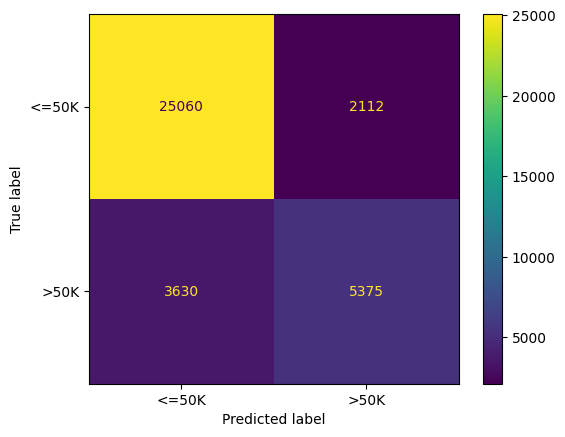

In [18]:
print("The confusion matrix on the TRAIN set is: ")
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)
disp = ConfusionMatrixDisplay(cm_train,display_labels=classification.classes_);
disp.plot()
plt.show()

The confusion matrix on the TEST set is: 
[[6344  498]
 [ 903 1300]]


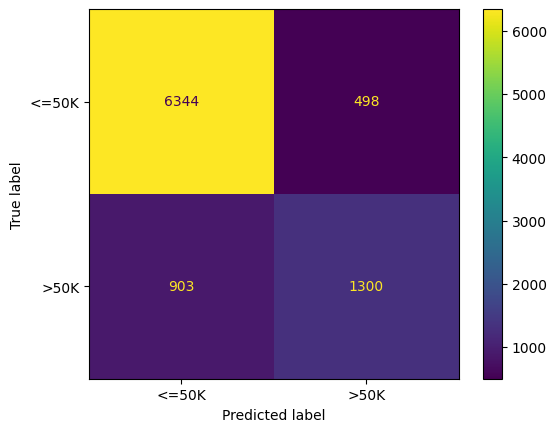

In [19]:
print("The confusion matrix on the TEST set is: ")
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)
disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_);
disp.plot()
plt.show()

In [20]:
y_train.value_counts()

income
<=50K    27172
>50K      9005
Name: count, dtype: int64

In [21]:
# classification.score == accuracy of prediction
# Accuracy score = (TP + TN)/(TP + TN + FP + FN)
print("The accuracy in the TRAIN set is: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("The accuracy in the TEST  set is: {:.2f}".format(accuracy_score(y_test, y_test_pred)))

The accuracy in the TRAIN set is: 0.84
The accuracy in the TEST  set is: 0.85


In [22]:
# Precission score. = TP/(TP + FP)
#If we're using labels instead of numbers for the classes to predict, we need to
# provide what class is the "positive" and which is the "negative"
print("The precission in the TRAIN set is: {:.2f}".format(precision_score(y_train, y_train_pred, pos_label="<=50K")))
print("The precission in the TEST  set is: {:.2f}".format(precision_score(y_test, y_test_pred, pos_label="<=50K")))

The precission in the TRAIN set is: 0.87
The precission in the TEST  set is: 0.88


In [23]:
# Recall score = TP / ( TP + FN)
print("The recall in the TRAIN set is: {:.2f}".format(recall_score(y_train, y_train_pred, pos_label="<=50K")))
print("The recall in the TEST  set is: {:.2f}".format(recall_score(y_test,  y_test_pred, pos_label="<=50K")))

The recall in the TRAIN set is: 0.92
The recall in the TEST  set is: 0.93


In [24]:
print("The F1-score for the TRAIN set is {:.2f}".format(f1_score(y_train,y_train_pred, pos_label="<=50K")))

The F1-score for the TRAIN set is 0.90


In [25]:
print("The F1-score for the TEST set is {:.2f}".format(f1_score(y_test,y_test_pred, pos_label="<=50K")))

The F1-score for the TEST set is 0.90


In [26]:
print(classification_report(y_train, y_train_pred,target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90     27172
        >50K       0.72      0.60      0.65      9005

    accuracy                           0.84     36177
   macro avg       0.80      0.76      0.77     36177
weighted avg       0.83      0.84      0.84     36177



In [27]:
print(classification_report(y_test, y_test_pred,target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6842
        >50K       0.72      0.59      0.65      2203

    accuracy                           0.85      9045
   macro avg       0.80      0.76      0.78      9045
weighted avg       0.84      0.85      0.84      9045



In [28]:
from sklearn.metrics import cohen_kappa_score

In [29]:
cohen_kappa_score(y_train, y_train_pred)

0.5501673103882622

In [30]:
cohen_kappa_score(y_test, y_test_pred)

0.5517027117467517

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_train_pred  = classification.predict(X_train_treated_df)

print("The accuracy in the TRAIN  set is: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("The precission in the TRAIN  set is: {:.2f}".format(precision_score(y_train, y_train_pred, pos_label="<=50K")))
print("The recall in the TRAIN  set is: {:.2f}".format(recall_score(y_train,  y_train_pred, pos_label="<=50K")))
print("The F1-score for the TRAIN set is {:.2f}".format(f1_score(y_train,y_train_pred, pos_label="<=50K")))
print("The Kappa in the TRAIN set is: {:.2f}".format(cohen_kappa_score(y_train,y_train_pred)))

The accuracy in the TRAIN  set is: 0.84
The precission in the TRAIN  set is: 0.87
The recall in the TRAIN  set is: 0.92
The F1-score for the TRAIN set is 0.90
The Kappa in the TRAIN set is: 0.55


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_test_pred  = classification.predict(X_test_treated_df)

print("The accuracy in the TEST  set is: {:.2f}".format(accuracy_score(y_test, y_test_pred)))
print("The precission in the TEST  set is: {:.2f}".format(precision_score(y_test, y_test_pred, pos_label="<=50K")))
print("The recall in the TEST  set is: {:.2f}".format(recall_score(y_test,  y_test_pred, pos_label="<=50K")))
print("The F1-score for the TEST set is {:.2f}".format(f1_score(y_test,y_test_pred, pos_label="<=50K")))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_pred)))

The accuracy in the TEST  set is: 0.85
The precission in the TEST  set is: 0.88
The recall in the TEST  set is: 0.93
The F1-score for the TEST set is 0.90
The Kappa in the TEST set is: 0.55


income
<=50K    34014
>50K     11208
Name: count, dtype: int64


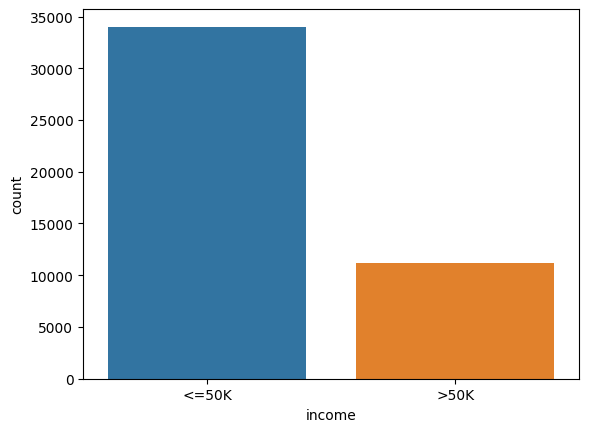

In [33]:
count_classes = data['income'].value_counts()
print(count_classes)
sns.countplot(x = 'income', data = data);
plt.show()

In [34]:
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0 ]+count_classes[1])))

The class imbalance ratio is: 0.50


In [35]:
#we fail to identify 40%+ of income classes!

In [36]:
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smoteenn.fit_resample(X_train_treated_df, y_train)

In [37]:
from sklearn.linear_model import LogisticRegression

classification2 = LogisticRegression(random_state=0, solver='saga',
                  multi_class='ovr')

classification2.fit(X_resampled, y_resampled)
y_resampled_pred = classification2.predict(X_resampled)
# save the model with pickle

print("The accuracy in the TRAIN  set is: {:.2f}".format(accuracy_score(y_resampled, y_resampled_pred)))
print("The precission in the TRAIN  set is: {:.2f}".format(precision_score(y_resampled,y_resampled_pred, pos_label="<=50K")))
print("The recall in the TRAIN  set is: {:.2f}".format(recall_score(y_resampled,  y_resampled_pred, pos_label="<=50K")))
print("The F1-score for the TRAIN set is {:.2f}".format(f1_score(y_resampled,y_resampled_pred, pos_label="<=50K")))
print("The Kappa in the TRAIN set is: {:.2f}".format(cohen_kappa_score(y_resampled,y_resampled_pred)))

The accuracy in the TRAIN  set is: 0.93
The precission in the TRAIN  set is: 0.93
The recall in the TRAIN  set is: 0.92
The F1-score for the TRAIN set is 0.93
The Kappa in the TRAIN set is: 0.86


The confusion matrix on the TRAIN set is: 
[[16992  1476]
 [ 1215 20157]]


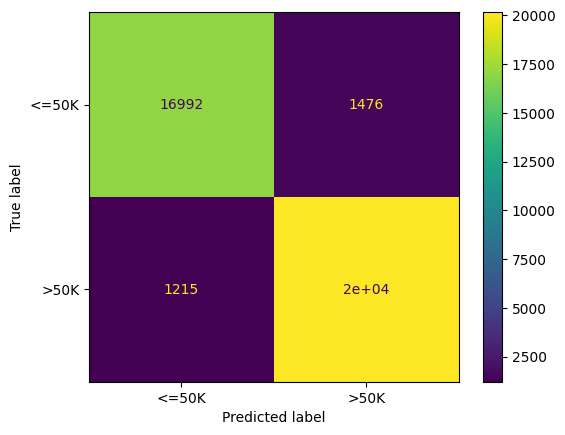

In [38]:
print("The confusion matrix on the TRAIN set is: ")
cm_train = confusion_matrix(y_resampled, y_resampled_pred)
print(cm_train)
disp = ConfusionMatrixDisplay(cm_train,display_labels=classification2.classes_);
disp.plot()
plt.show()

In [39]:
from sklearn.linear_model import LogisticRegression

classification2 = LogisticRegression(random_state=0, solver='saga',
                  multi_class='ovr')

classification2.fit(X_resampled, y_resampled)
y_pred_test = classification2.predict(X_test_treated_df)
# save the model with pickle

print("The accuracy in the TEST  set is: {:.2f}".format(accuracy_score(y_test, y_test_pred)))
print("The precission in the TEST  set is: {:.2f}".format(precision_score(y_test, y_test_pred, pos_label="<=50K")))
print("The recall in the TEST  set is: {:.2f}".format(recall_score(y_test, y_test_pred, pos_label="<=50K")))
print("The F1-score for the TEST set is {:.2f}".format(f1_score(y_test, y_test_pred, pos_label="<=50K")))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test, y_test_pred)))

The accuracy in the TEST  set is: 0.85
The precission in the TEST  set is: 0.88
The recall in the TEST  set is: 0.93
The F1-score for the TEST set is 0.90
The Kappa in the TEST set is: 0.55


The confusion matrix on the TRAIN set is: 
[[25060  2112]
 [ 3630  5375]]


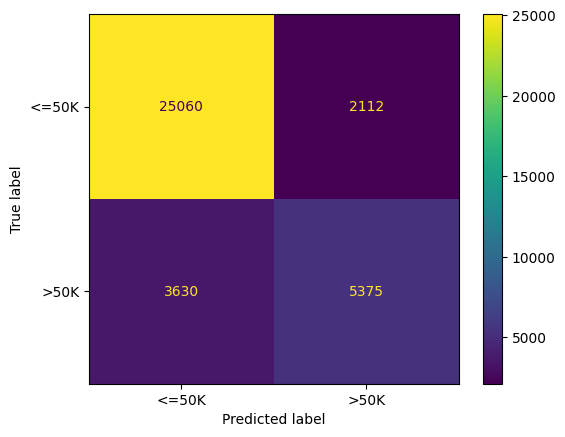

In [40]:
print("The confusion matrix on the TRAIN set is: ")
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)
disp = ConfusionMatrixDisplay(cm_train,display_labels=classification.classes_);
disp.plot()
plt.show()

In [41]:
X_train_treated_df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.670522,0.799631,1.156495,-0.303593,-0.223422,-0.071225,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.165596,-0.857281,1.156495,-0.303593,-0.223422,0.756949,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.312181,0.587641,1.156495,-0.303593,-0.223422,-2.192907,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.520201,-0.723412,-0.094784,-0.303593,-0.223422,-2.192907,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.373498,0.320248,-0.487806,-0.303593,-0.223422,0.756949,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
classification2.classes_

array(['<=50K', '>50K'], dtype=object)

In [43]:
classification2.predict(X_train_treated_df)

array(['<=50K', '>50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [44]:
classification2.predict_proba(X_train_treated_df) # 1 -> <=50K, 0 -> >50K

array([[0.66329594, 0.33670406],
       [0.00875014, 0.99124986],
       [0.05067475, 0.94932525],
       ...,
       [0.52116188, 0.47883812],
       [0.99678792, 0.00321208],
       [0.77283613, 0.22716387]])

In [45]:
importances = list(zip(list(np.abs(classification2.coef_[0])), list(classification2.coef_[0]),  list(X_resampled.columns)))
importances.sort(reverse=True)
importances

[(3.5047416667766984, 3.5047416667766984, 'marital-status_Married-civ-spouse'),
 (2.888592653479027, 2.888592653479027, 'marital-status_Married-AF-spouse'),
 (2.2026922395629427, 2.2026922395629427, 'relationship_Wife'),
 (2.0540462488122446, -2.0540462488122446, 'workclass_State-gov'),
 (2.04294578273708, -2.04294578273708, 'occupation_Other-service'),
 (2.0045455527596237, -2.0045455527596237, 'occupation_Farming-fishing'),
 (1.9029919357157272, -1.9029919357157272, 'workclass_Self-emp-not-inc'),
 (1.7980591625350724, -1.7980591625350724, 'occupation_Priv-house-serv'),
 (1.661791942353104, 1.661791942353104, 'education_Prof-school'),
 (1.579398658165482, 1.579398658165482, 'native-country_Portugal'),
 (1.3488166928054341, 1.3488166928054341, 'gender_Male'),
 (1.3334268555365378, -1.3334268555365378, 'occupation_Handlers-cleaners'),
 (1.2726131078929745, -1.2726131078929745, 'workclass_Local-gov'),
 (1.2600312592331866, -1.2600312592331866, 'native-country_Trinadad&Tobago'),
 (1.21369

In [46]:
from matplotlib import pyplot

In [47]:
importance = classification2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 1.07817
Feature: 1, Score: 0.17901
Feature: 2, Score: 1.18914
Feature: 3, Score: 1.12268
Feature: 4, Score: 0.48189
Feature: 5, Score: 0.92410
Feature: 6, Score: -1.27261
Feature: 7, Score: -0.84035
Feature: 8, Score: -0.20584
Feature: 9, Score: -1.90299
Feature: 10, Score: -2.05405
Feature: 11, Score: -0.50847
Feature: 12, Score: 0.68446
Feature: 13, Score: -0.00634
Feature: 14, Score: 0.66781
Feature: 15, Score: -0.32096
Feature: 16, Score: 1.66179
Feature: 17, Score: 0.61014
Feature: 18, Score: 2.88859
Feature: 19, Score: 3.50474
Feature: 20, Score: 0.11188
Feature: 21, Score: -0.55603
Feature: 22, Score: -0.06364
Feature: 23, Score: 0.02277
Feature: 24, Score: -0.06217
Feature: 25, Score: -0.15468
Feature: 26, Score: 1.08022
Feature: 27, Score: -2.00455
Feature: 28, Score: -1.33343
Feature: 29, Score: -0.95657
Feature: 30, Score: -2.04295
Feature: 31, Score: -1.79806
Feature: 32, Score: 0.74763
Feature: 33, Score: 0.84022
Feature: 34, Score: 0.15394
Feature: 35, 

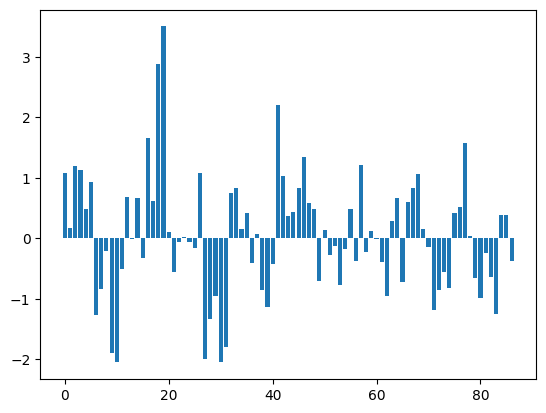

In [48]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [63]:
feature_names = X_resampled.columns
coefficients = classification2.coef_[0]

In [68]:
feature_names_list = feature_names.tolist()


In [69]:
df_importance = pd.DataFrame({'feature_names': feature_names_list, 'coefficients': coefficients})

In [70]:
df_importance.rename(columns={'coefficients': 'feature_importance'}, inplace=True)

In [71]:
df_importance.sort_values(by='feature_importance', ascending=False, inplace=True)


In [72]:
print(df_importance)

                        feature_names  feature_importance
19  marital-status_Married-civ-spouse            3.504742
18   marital-status_Married-AF-spouse            2.888593
41                  relationship_Wife            2.202692
16              education_Prof-school            1.661792
77            native-country_Portugal            1.579399
..                                ...                 ...
31         occupation_Priv-house-serv           -1.798059
9          workclass_Self-emp-not-inc           -1.902992
27         occupation_Farming-fishing           -2.004546
30           occupation_Other-service           -2.042946
10                workclass_State-gov           -2.054046

[87 rows x 2 columns]


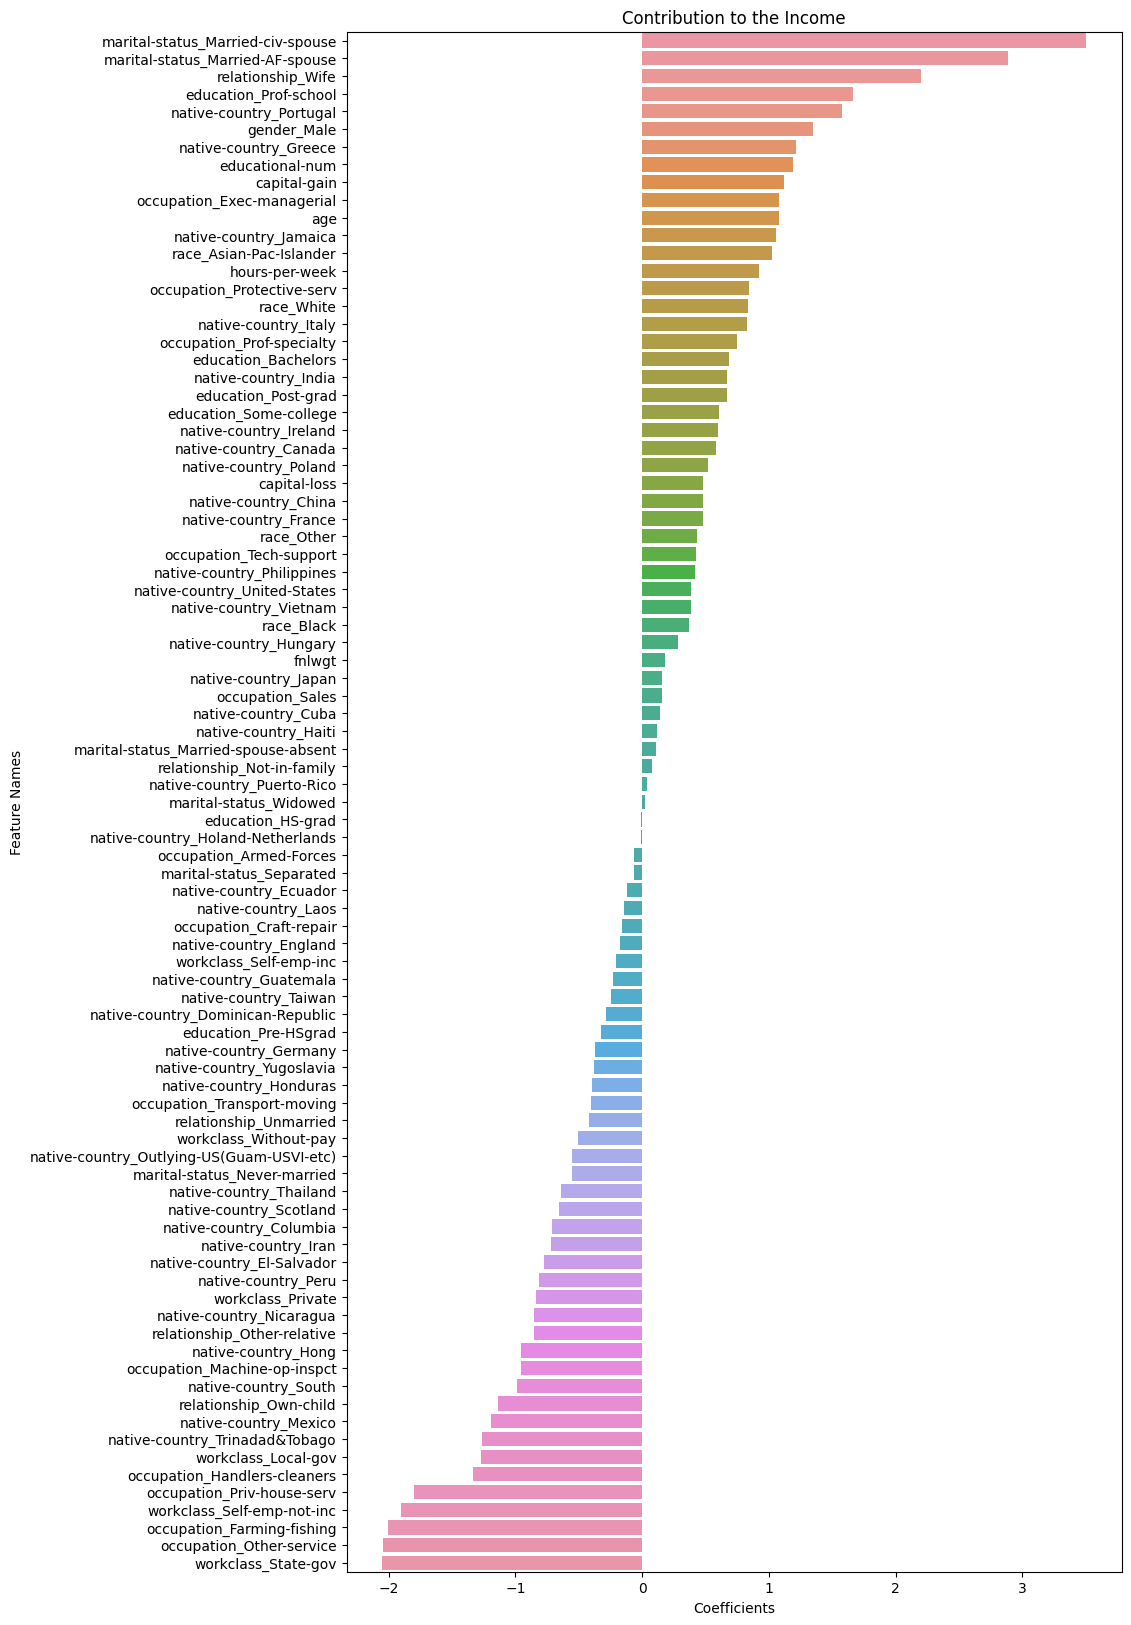

In [84]:
plt.figure(figsize=(10, 20))
sns.barplot(x='feature_importance', y='feature_names', data=df_importance)
plt.title('Contribution to the Income')
plt.xlabel('Coefficients')
plt.ylabel('Feature Names')
plt.show()